In [3]:
import sys
from pathlib import Path
import importlib
import matplotlib.pyplot as plt
import numpy as np

if str(Path.cwd().parent) not in sys.path:
    sys.path.insert(0, str(Path.cwd().parent))

import src.aih_privacy.datasets.sisfall as sis
importlib.reload(sis)

# dataset loaders
from  src.aih_privacy.datasets.sisfall import (
    iter_files, 
    load_file,
    acc_magnitude,
    parse_filename,
    window_stat,
)

In [9]:
files = iter_files()
print("Total:", len(files))
print(files[0])

meta = parse_filename(files[0])
print("Meta:", meta)

df0 = load_file(files[0])
df0.head()

Total: 4505
C:\AIH\Workspace\AIH_fall_privacy\data\raw\sisfall\SA01\D01_SA01_R01.txt
Meta: ('D01', 'SA01', 'SA', 0)


,acc_x_adxl345,acc_y_adxl345,acc_z_adxl345,gyro_x_itg3200,gyro_y_itg3200,gyro_z_itg3200,acc_x_mma8451q,acc_y_mma8451q,acc_z_mma8451q
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883


In [ ]:
fall_file = next(f for f in files if parse_filename(f)[-1] == 1)
adl_file  = next(f for f in files if parse_filename(f)[-1] == 0)

df_fall = load_file(fall_file)
df_adl  = load_file(adl_file)


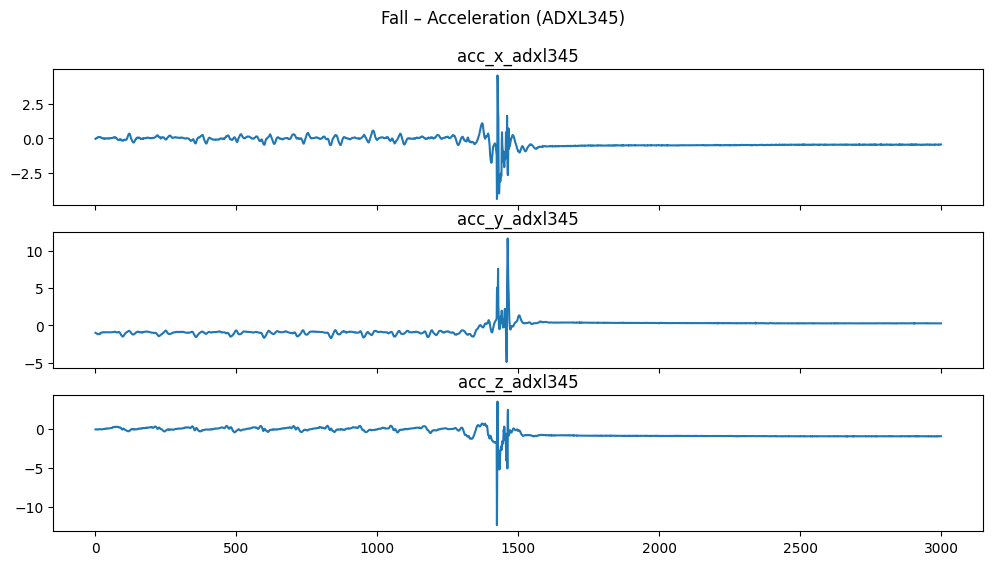

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
for i, axis in enumerate(["acc_x_adxl345", "acc_y_adxl345", "acc_z_adxl345"]):
    axs[i].plot(df_fall[axis])
    axs[i].set_title(axis)

plt.suptitle("Fall – Acceleration (ADXL345)")
plt.show()


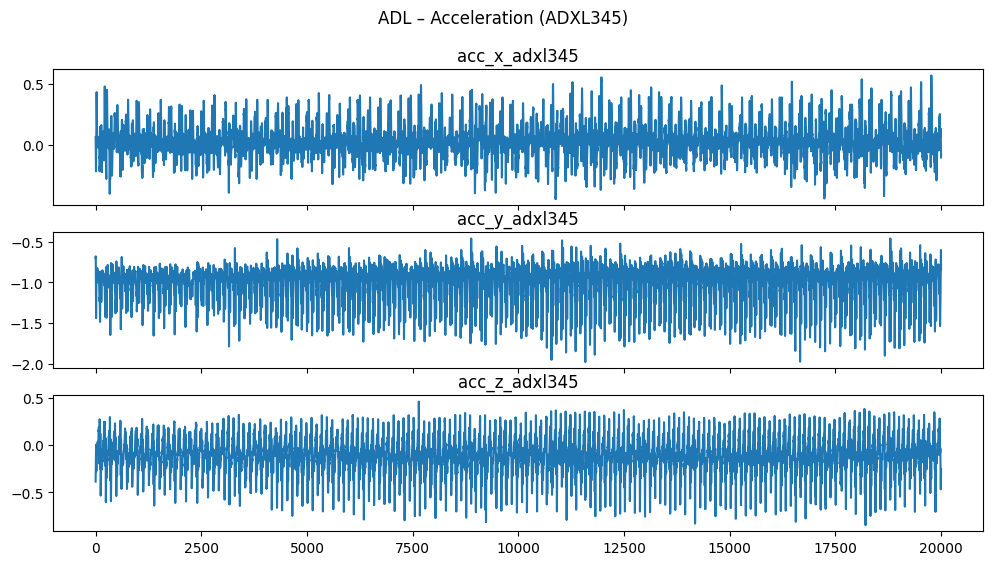

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
for i, axis in enumerate(["acc_x_adxl345", "acc_y_adxl345", "acc_z_adxl345"]):
    axs[i].plot(df_adl[axis])
    axs[i].set_title(axis)

plt.suptitle("ADL – Acceleration (ADXL345)")
plt.show()

In [15]:
df_fall["acc_mag"] = acc_magnitude(df_fall)
df_adl["acc_mag"]  = acc_magnitude(df_adl)

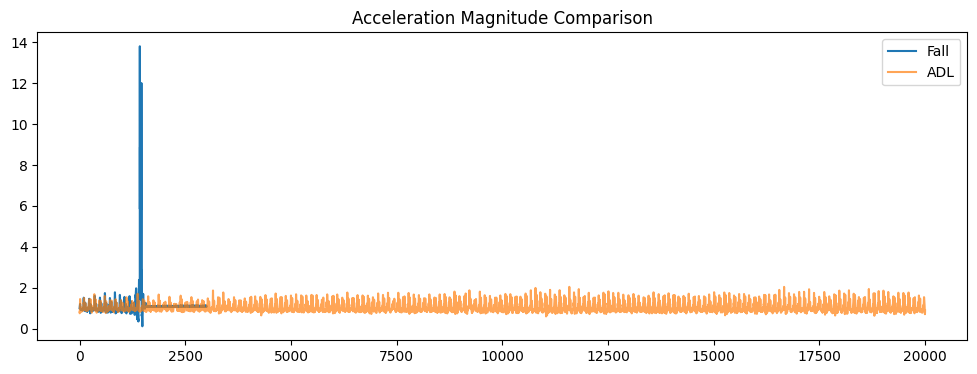

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df_fall["acc_mag"], label="Fall")
plt.plot(df_adl["acc_mag"], label="ADL", alpha=0.7)
plt.legend()
plt.title("Acceleration Magnitude Comparison")
plt.show()

In [17]:
df_fall["acc_mag_diff"] = df_fall["acc_mag"].diff().abs()
df_adl["acc_mag_diff"]  = df_adl["acc_mag"].diff().abs()

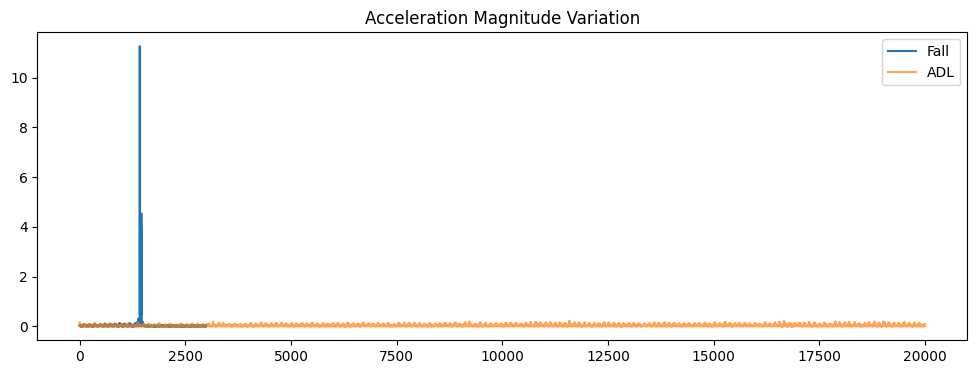

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(df_fall["acc_mag_diff"], label="Fall")
plt.plot(df_adl["acc_mag_diff"], label="ADL", alpha=0.7)
plt.legend()
plt.title("Acceleration Magnitude Variation")
plt.show()

In [19]:
fall_max = window_stat(df_fall["acc_mag"], np.max)
adl_max  = window_stat(df_adl["acc_mag"], np.max)

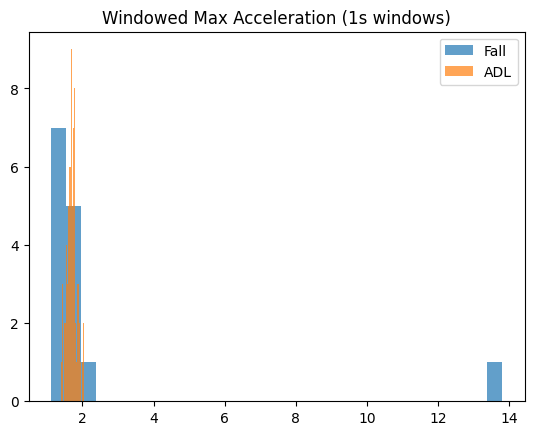

In [20]:
plt.hist(fall_max, bins=30, alpha=0.7, label="Fall")
plt.hist(adl_max, bins=30, alpha=0.7, label="ADL")
plt.legend()
plt.title("Windowed Max Acceleration (1s windows)")
plt.show()

In [23]:
falls = []
adls = []

for f in iter_files():
    label = parse_filename(f)[-1]
    if label == 1 and len(falls) < 3:
        falls.append(f)
    elif label == 0 and len(adls) < 3:
        adls.append(f)
    if len(falls) == 3 and len(adls) == 3:
        break

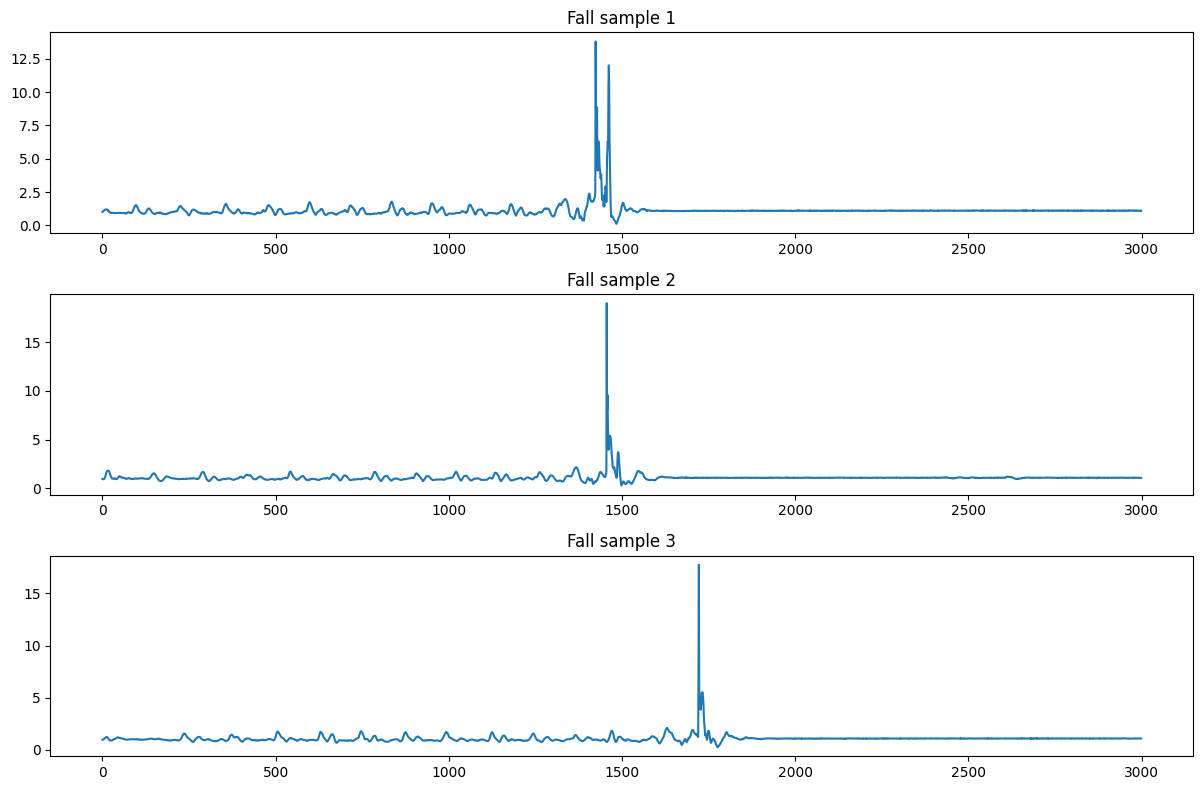

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

for i, f in enumerate(falls):
    df = load_file(f)
    acc_mag = acc_magnitude(df)
    axs[i].plot(acc_mag)
    axs[i].set_title(f"Fall sample {i+1}")

plt.tight_layout()
plt.show()


In [28]:
fall_max = []
adl_max = []

for f in iter_files():
    df = load_file(f)
    label = parse_filename(f)[-1]

    df["acc_mag"] = acc_magnitude(df)

    if label == 1:
        fall_max.append(df["acc_mag"].max())
    else:
        adl_max.append(df["acc_mag"].max())


C:\Users\User\AppData\Local\Temp\ipykernel_14472\3181901857.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fall_max, adl_max], labels=["Fall", "ADL"])


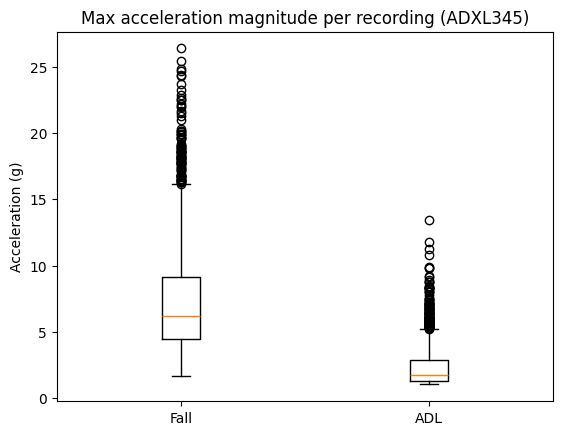

In [29]:
plt.boxplot([fall_max, adl_max], labels=["Fall", "ADL"])
plt.title("Max acceleration magnitude per recording (ADXL345)")
plt.ylabel("Acceleration (g)")
plt.show()

In [31]:
fall_axis_max = {"x": [], "y": [], "z": []}
adl_axis_max  = {"x": [], "y": [], "z": []}

for f in iter_files():
    df = load_file(f)
    label = parse_filename(f)[-1]

    axes = {
        "x": df["acc_x_adxl345"].abs().max(),
        "y": df["acc_y_adxl345"].abs().max(),
        "z": df["acc_z_adxl345"].abs().max(),
    }

    if label == 1:
        for k in axes:
            fall_axis_max[k].append(axes[k])
    else:
        for k in axes:
            adl_axis_max[k].append(axes[k])


C:\Users\User\AppData\Local\Temp\ipykernel_14472\179576417.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


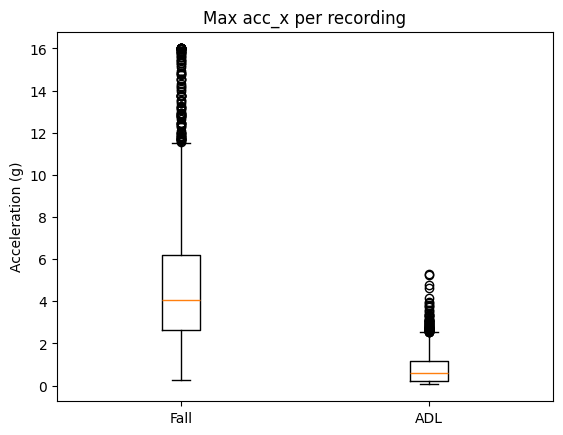

In [33]:
plt.boxplot(
    [fall_axis_max["x"], adl_axis_max["x"]],
    labels=["Fall", "ADL"]
)
plt.title("Max acc_x per recording")
plt.ylabel("Acceleration (g)")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14472\2403033078.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


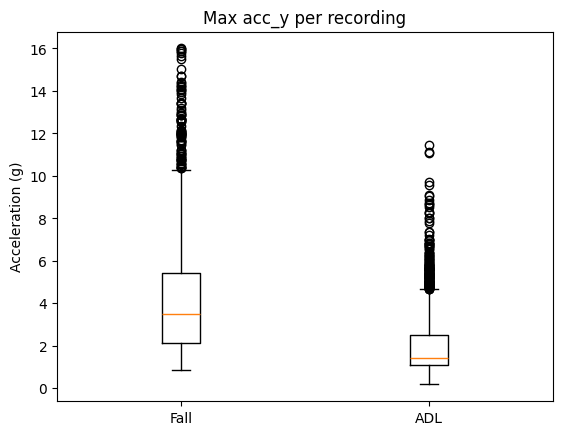

In [34]:
plt.boxplot(
    [fall_axis_max["y"], adl_axis_max["y"]],
    labels=["Fall", "ADL"]
)
plt.title("Max acc_y per recording")
plt.ylabel("Acceleration (g)")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14472\1813983325.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


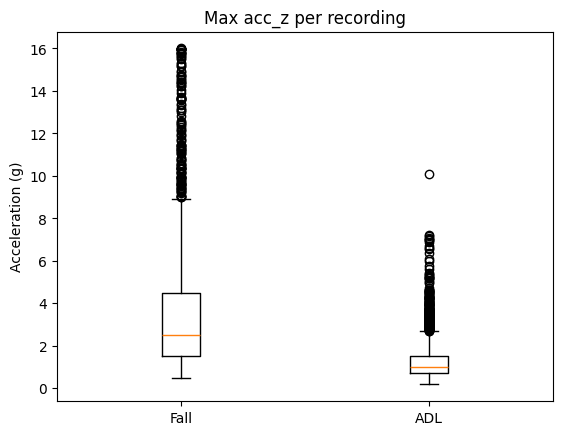

In [35]:
plt.boxplot(
    [fall_axis_max["z"], adl_axis_max["z"]],
    labels=["Fall", "ADL"]
)
plt.title("Max acc_z per recording")
plt.ylabel("Acceleration (g)")
plt.show()


In [36]:
df["gyro_mag"] = np.sqrt(
    df["gyro_x_itg3200"]**2 +
    df["gyro_y_itg3200"]**2 +
    df["gyro_z_itg3200"]**2
)

In [37]:
fall_gyro_max = []
adl_gyro_max = []

for f in iter_files():
    df = load_file(f)
    label = parse_filename(f)[-1]

    df["gyro_mag"] = np.sqrt(
        df["gyro_x_itg3200"]**2 +
        df["gyro_y_itg3200"]**2 +
        df["gyro_z_itg3200"]**2
    )

    if label == 1:
        fall_gyro_max.append(df["gyro_mag"].max())
    else:
        adl_gyro_max.append(df["gyro_mag"].max())


C:\Users\User\AppData\Local\Temp\ipykernel_14472\3805418714.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fall_gyro_max, adl_gyro_max], labels=["Fall", "ADL"])


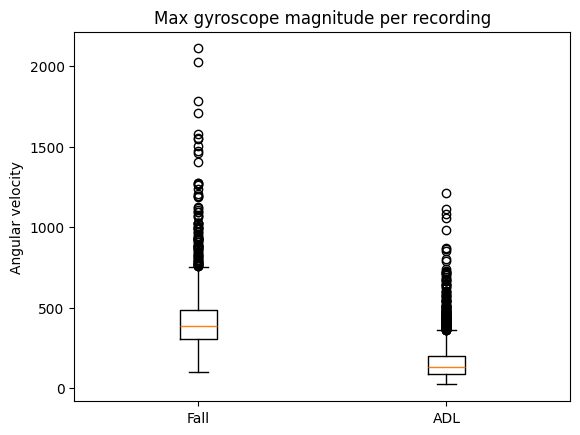

In [38]:
plt.boxplot([fall_gyro_max, adl_gyro_max], labels=["Fall", "ADL"])
plt.title("Max gyroscope magnitude per recording")
plt.ylabel("Angular velocity")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14472\2413188147.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


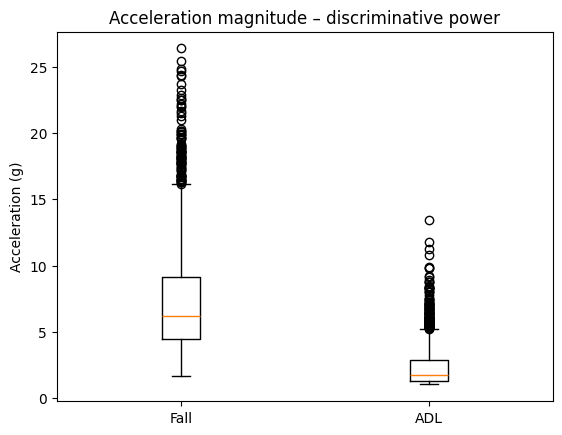

C:\Users\User\AppData\Local\Temp\ipykernel_14472\2413188147.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


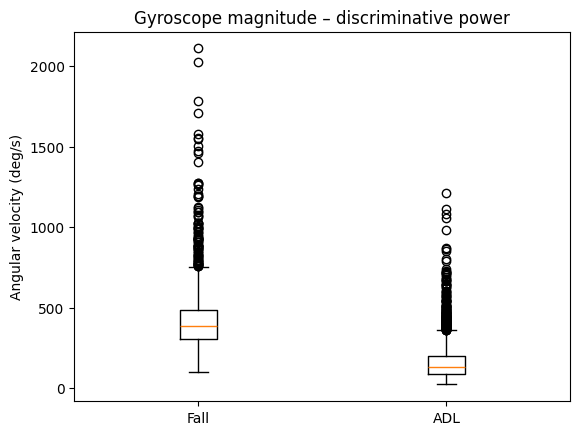

In [39]:
plt.boxplot(
    [fall_max, adl_max],
    labels=["Fall", "ADL"]
)
plt.title("Acceleration magnitude – discriminative power")
plt.ylabel("Acceleration (g)")
plt.show()

plt.boxplot(
    [fall_gyro_max, adl_gyro_max],
    labels=["Fall", "ADL"]
)
plt.title("Gyroscope magnitude – discriminative power")
plt.ylabel("Angular velocity (deg/s)")
plt.show()

